<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


c:\Users\dan_r\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


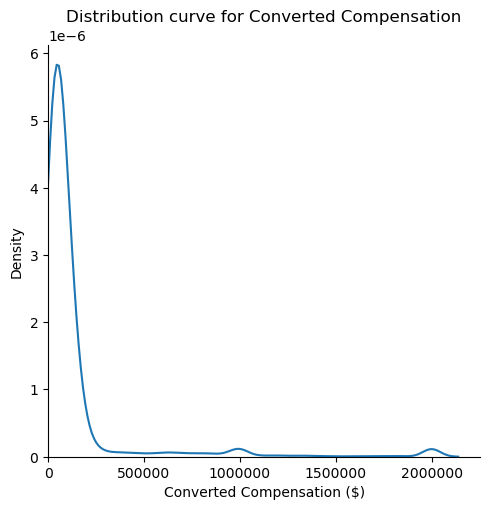

In [30]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df, x='ConvertedComp', kind='kde')
plt.ticklabel_format(scilimits=(0,7))
plt.title('Distribution curve for Converted Compensation')
plt.xlabel('Converted Compensation ($)')
plt.xlim(0)
plt.show()

Plot the histogram for the column `ConvertedComp`.


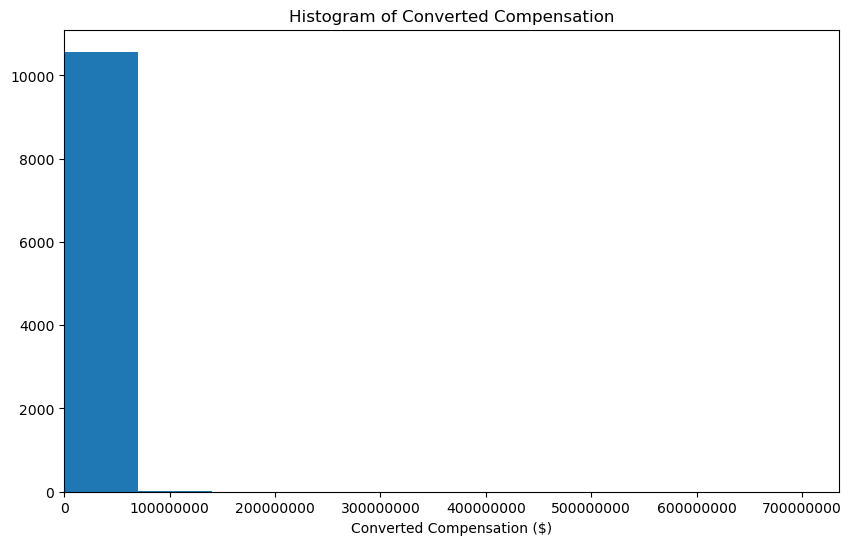

In [35]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(10,6))
plt.hist(df['CompTotal'])
plt.ticklabel_format(scilimits=(0,10))
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation ($)')
plt.xlim(0)
plt.show()

#This show that there are outliers that are skewing the data



What is the median of the column `ConvertedComp`?


In [36]:
# your code goes here
df['ConvertedComp'].median()


57745.0

In [120]:
df['Age'].median()

29.0

How many responders identified themselves only as a **Man**?


In [44]:
# your code goes here
df['Gender'].value_counts()['Man']

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [49]:
# your code goes here
df[df['Gender']== 'Woman']['ConvertedComp'].median()


57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [58]:
# your code goes here
df['Age'].describe().loc[['min','25%','50%','75%','max']]

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


c:\Users\dan_r\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


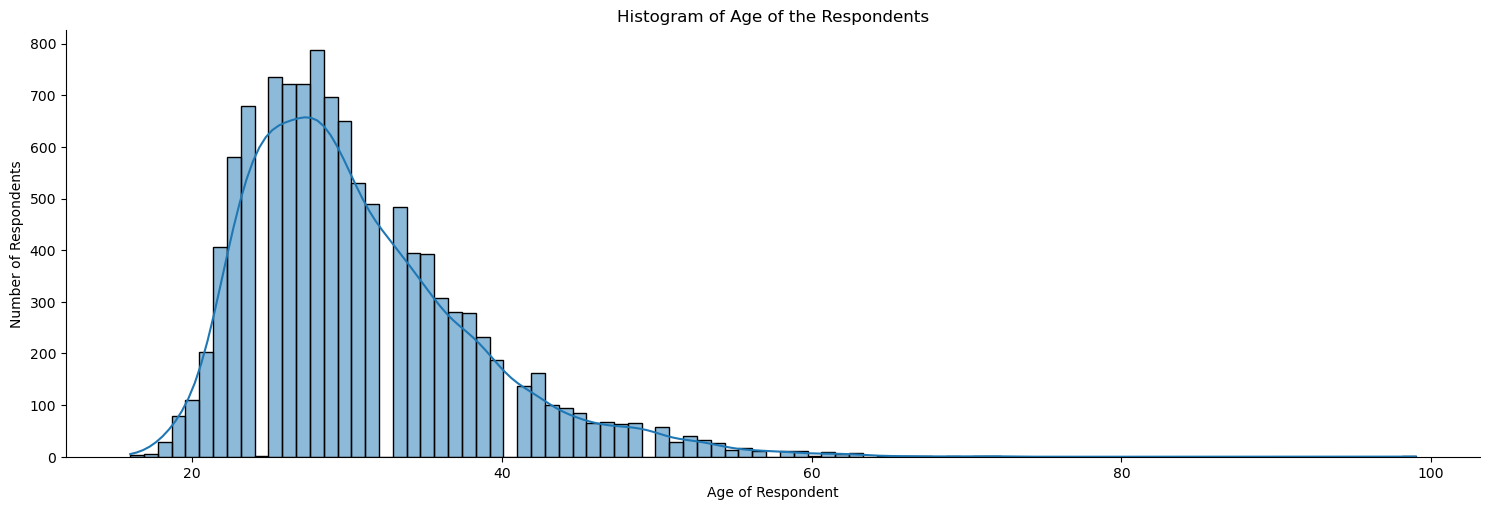

In [79]:
# your code goes here
sns.displot(data=df,x='Age',kind= 'hist', kde=True, height=5, aspect=3)
plt.title('Histogram of Age of the Respondents')
plt.xlabel('Age of Respondent')
plt.ylabel('Number of Respondents')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


In [81]:
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

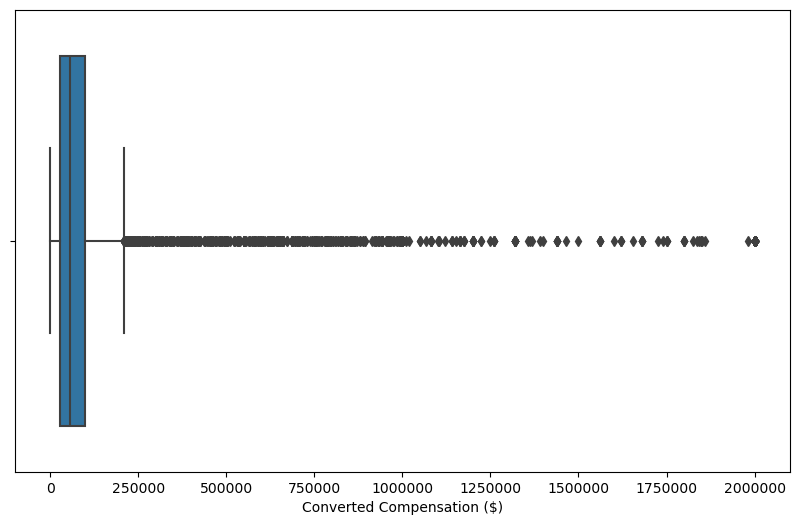

In [88]:
# your code goes here
plt.figure(figsize=(10,6))
ax = sns.boxplot(df,x='ConvertedComp')
plt.xlabel('Converted Compensation ($)')
ax.xaxis.get_major_formatter().set_scientific(False)



Find out the Inter Quartile Range for the column `ConvertedComp`.


In [90]:
# your code goes here
q1 = df["ConvertedComp"].quantile(0.25)
q3 = df["ConvertedComp"].quantile(0.75)
iqr = q3 - q1
print('The interquartile range is: ', iqr)

The interquartile range is:  73132.0


Find out the upper and lower bounds.


In [92]:
# your code goes here
upper = q3 + (iqr * 1.5)
lower = q1 - (iqr * 1.5)

print(f'The upper bound is {upper} and the lower bound is {lower}')

The upper bound is 209698.0 and the lower bound is -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [108]:
# your code goes here
import numpy as np
upper_outliers = df[df['ConvertedComp'] >= upper]['ConvertedComp'].count()
lower_outliers = df[df['ConvertedComp'] <= lower]['ConvertedComp'].count()

print('The number of upper outliers is:', upper_outliers)
print('The number of lower outliers is:', lower_outliers)

The number of upper outliers is: 879
The number of lower outliers is: 0


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


The shape of the original dataframe is (11398, 85)
The shape of the new dataframe is (9703, 85)


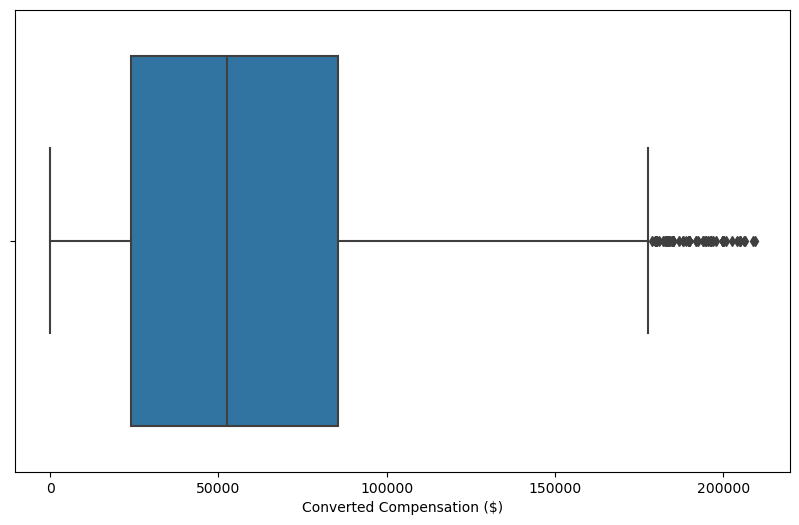

In [111]:
# your code goes here
#df1 is a new dataframe that will not contain the 'CovertedComp' outliers
#We do not need to take into account lower outliers as there are none
df1 = df[df['ConvertedComp'] <=upper]

print(f'The shape of the original dataframe is {df.shape}')
print(f'The shape of the new dataframe is {df1.shape}')

plt.figure(figsize=(10,6))
ax = sns.boxplot(df1,x='ConvertedComp')
plt.xlabel('Converted Compensation ($)')
ax.xaxis.get_major_formatter().set_scientific(False)


In [121]:
#Median of Converted Comp after removing outliers
df1['ConvertedComp'].median()

52704.0

In [123]:
#Mean of Converted Comp after removing outliers
df1['ConvertedComp'].mean()

59883.20838915799

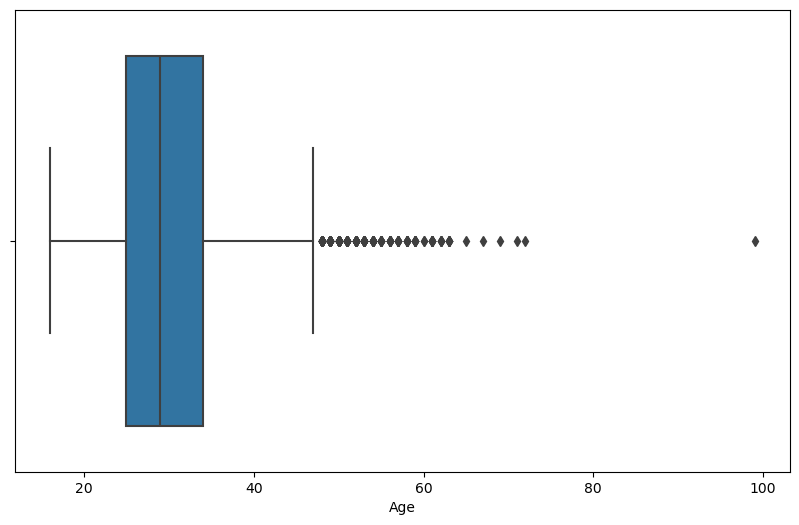

In [122]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(df1,x='Age')

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [119]:
# your code goes here
df1_num = df1.select_dtypes(include=np.number)

df1_num.corr()


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019354,0.010878,-0.016221,0.005293,0.002180
CompTotal,-0.019354,1.000000,-0.063561,0.004910,0.017007,0.006337
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821
WorkWeekHrs,-0.016221,0.004910,0.034351,1.000000,0.038935,0.032032
CodeRevHrs,0.005293,0.017007,-0.088934,0.038935,1.000000,-0.012878
Age,0.002180,0.006337,0.401821,0.032032,-0.012878,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
